# Exploratory Data Analysis in Action - EDA: Powerplants

Powerplant questions:
- Q1: How many power plants are located in Europe?
- Q2: Which European countries have the most power plants?
- Q3: Which country in the world has the most/the least power plants?
- Q4: Inspect the regional distribution of individual fuels in Germany
- Q5: Take a look at the United States of America. Inspect what types of powerplants have been constructed at what time
- Q6: _Come up with your own question_

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import sys
sys.path.append("../src/")

from helper import cuteplot
from helper import minmax_scaler
plt.rcParams["figure.figsize"] = [22,10]

In [2]:
import pickle
gdf_world = pickle.load(open( "../data/gdf_world.p", "rb" ))
gdf_europe = pickle.load(open( "../data/gdf_europe.p", "rb" ))
gdf_germany = pickle.load(open( "../data/gdf_germany.p", "rb" ))

> **Q1: How many power plants are located in Europe?**

In [3]:
len(gdf_europe['name of powerplant'])

9969

In [51]:
gdf_europe['name of powerplant'].nunique(dropna=False)

9834

In [56]:
gdf_europe['geometry'].nunique()

9480

In [57]:
gdf_europe['geometry'].isnull().sum()

0

In [43]:
gdf_europe.duplicated(subset=['name of powerplant']).sum()

135

In [75]:
test = gdf_europe.loc[gdf_europe.duplicated(subset=['name of powerplant'],keep=False)].sort_values(by='name of powerplant')
len(test)
test

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,start date,owner of plant,geolocation_source,estimated_generation_gwh_2020,green,continent,geometry
29269,ESP,Spain,AGREDA,16.33400,41.8559,-1.9224,Waste,2000,INTEVER S.A.,CARMA,5.68,False,Europe,POINT (-1.92240 41.85590)
29268,ESP,Spain,AGREDA,18.00000,41.8559,-1.9224,Wind,2013,PARQUE EOLICO SIERRA DEL MADERO S.A.,CARMA,50.55,True,Europe,POINT (-1.92240 41.85590)
23823,FRA,France,Aiguillon,1.17700,44.3009,0.3577,Hydro,-1,NaN,Open Power System Data,4.24,True,Europe,POINT (0.35770 44.30090)
23824,FRA,France,Aiguillon,2.57727,44.3009,0.3577,Solar,-1,NaN,Open Power System Data,4.05,True,Europe,POINT (0.35770 44.30090)
23828,FRA,France,Aix-en-Provence,4.24500,43.5361,5.3984,Biomass,-1,NaN,Open Power System Data,NaN,True,Europe,POINT (5.39840 43.53610)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,PRT,Portugal,Vila Cova,23.40000,40.3797,-7.7283,Hydro,2001,NaN,Energias Endogenas de Portugal,20.19,True,Europe,POINT (-7.72830 40.37970)
25792,FRA,France,Villerest,58.00000,45.9870,4.0480,Hydro,1984,EDF,GEODB,202.48,True,Europe,POINT (4.04800 45.98700)
25791,FRA,France,Villerest,58.00000,45.9869,4.0494,Hydro,1984,EDF,GEODB,202.48,True,Europe,POINT (4.04940 45.98690)
4841,DEU,Germany,Windpark Arneburg 2,31.50000,52.7002,11.9387,Wind,2001,SachsenFonds GmbH & Co. Windpark I KG,WRI,53.86,True,Europe,POINT (11.93870 52.70020)


In [63]:
test = gdf_europe.loc[gdf_europe.duplicated(subset=['geometry'],keep=False)]
len(test)
test

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,start date,owner of plant,geolocation_source,estimated_generation_gwh_2020,green,continent,geometry
3080,AUT,Austria,Erzbach,1.0,47.6000,14.7333,Hydro,1986,Verbund,CARMA,4.17,True,Europe,POINT (14.73330 47.60000)
3093,AUT,Austria,Hieflau,63.0,47.6000,14.7333,Hydro,-1,Verbund,CARMA,195.69,True,Europe,POINT (14.73330 47.60000)
3094,AUT,Austria,Hieflau-Erzbach,1.0,47.6000,14.7333,Hydro,1956,Verbund,CARMA,4.17,True,Europe,POINT (14.73330 47.60000)
3104,AUT,Austria,Kaprun main stage,240.0,47.2591,12.7389,Hydro,1953,Verbund,GEODB,537.34,True,Europe,POINT (12.73890 47.25910)
3106,AUT,Austria,Klammsee,1.0,47.2591,12.7389,Hydro,1947,Verbund,GEODB,3.66,True,Europe,POINT (12.73890 47.25910)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33436,GBR,United Kingdom,West Hill Farm (solar),7.3,51.1461,-4.1377,Solar,-1,Lumicity,UK Renewable Energy Planning Database,11.27,True,Europe,POINT (-4.13770 51.14610)
33507,GBR,United Kingdom,Wilsom Farm,11.0,51.1424,-0.9501,Solar,-1,Canadian solar,UK Renewable Energy Planning Database,17.21,True,Europe,POINT (-0.95010 51.14240)
33509,GBR,United Kingdom,Wilton 10,38.0,54.5674,-1.0967,Biomass,-1,UK Wood Recycling,UK Renewable Energy Planning Database,NaN,True,Europe,POINT (-1.09670 54.56740)
33510,GBR,United Kingdom,Wilton 11 EfW,49.0,54.5674,-1.0967,Waste,-1,SUEZ / Sembcorp UK,UK Renewable Energy Planning Database,47.45,False,Europe,POINT (-1.09670 54.56740)


> **Q2: Which European countries have the most power plants?**

In [6]:
powerplants = pd.read_csv("../data/powerplants.csv")

#powerplants['name of powerplant'].nunique()
#powerplants
#gdf_europe

In [7]:
len(gdf_europe['geometry'])

9969

In [8]:
gdf_europe['latitude'].isnull().sum()

0

In [9]:
gdf_europe['latitude'].nunique()

9159

In [10]:
len(gdf_europe['geometry'])

9969

In [11]:
len(gdf_europe['geometry'].drop_duplicates())

9480

In [12]:
gdf_europe.groupby(['country'])['geometry'].count().sum()

9969

In [13]:
gdf_europe_clean = gdf_europe.drop_duplicates(subset ='geometry')

In [14]:
len(gdf_europe_clean)

9480

In [15]:
print('Top Ten')
gdf_europe_clean.groupby(['country'])['latitude'].count().sort_values(ascending=False)[:10]

Top Ten


country
United Kingdom    2481
France            1984
Germany           1244
Spain              661
Czech Republic     458
Portugal           417
Italy              377
Norway             290
Russia             217
Poland             187
Name: latitude, dtype: int64

In [16]:
gdf_europe.groupby(['country'])['latitude'].count().sort_values(ascending=False)[:10]

country
United Kingdom    2582
France            2063
Germany           1292
Spain              791
Czech Republic     462
Portugal           429
Italy              382
Norway             293
Russia             220
Poland             187
Name: latitude, dtype: int64

> **Q3: Which country in the world has the most/the least power plants?**

In [17]:
gdf_world_clean = gdf_world.drop_duplicates(subset ='geometry')

In [18]:
gdf_world_clean.groupby(['country'])['latitude'].count().sort_values(ascending=False)[:1]

country
United States of America    9562
Name: latitude, dtype: int64

In [19]:
gdf_world_clean.groupby(['country'])['geometry'].count().sort_values(ascending=False)[-10:]

country
Liberia                     2
Eritrea                     2
Botswana                    2
Central African Republic    2
Palestine                   1
Guinea-Bissau               1
Equatorial Guinea           1
Suriname                    1
Lesotho                     1
Zimbabwe                    1
Name: geometry, dtype: int64

> **Q4: Inspect the regional distribution of individual fuels in Germany**

> _Note: Some fuels may be distributed differently than expected. Is the dataset or are the state politics to blame?_

> _Hint: you can use `map_extent = (5, 16, 47, 55)` for the `cuteplot()` function to draw a map of germany. You can use the `draw_water=True` keyword in the `cuteplot()` function to draw (the biggest) rivers and lakes._


In [20]:
gdf_germany['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Waste', 'Coal', 'Oil', 'Biomass',
       'Nuclear', 'Other', 'Wind'], dtype=object)

Text(0.5, 1.0, 'Powerplants in Germany')

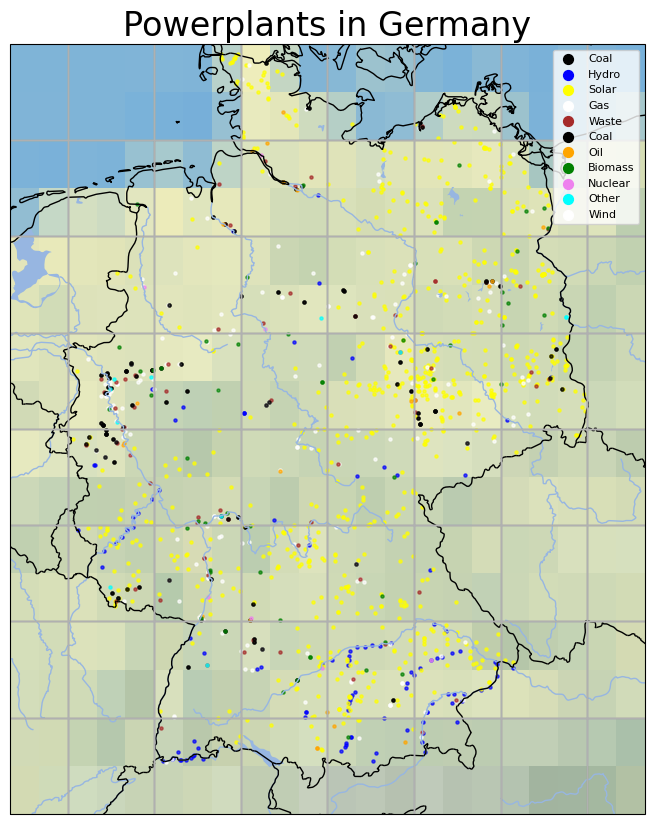

In [21]:
from helper import cuteplot

fig,ax = cuteplot(gdf_germany.loc[gdf_germany["primary_fuel"] == 'Coal'],color = 'k',markersize=5,map_extent = (5, 16, 47, 55),alpha=0.7,bw=0.1,label='Coal',draw_water=True);
fuels = gdf_germany['primary_fuel'].unique()
colors ={'Hydro': 'blue', 'Solar': 'yellow', 'Gas': 'white', 'Waste' : 'brown', 'Coal' : 'black', 'Oil': 'orange', 'Biomass' : 'green',
       'Nuclear' : 'violet', 'Other' : 'cyan', 'Wind' : 'white'}
for fuel in fuels:
    
    cuteplot(gdf_germany.loc[gdf_germany["primary_fuel"] == fuel],
    map_extent=(5, 16, 47, 55),
    color = colors[fuel],
    markersize=5,
    alpha=0.7,
    bw=0.4,
    ax=ax,
    label=fuel
    )
#cuteplot?
ax.legend(fontsize=8)
ax.set_title("Powerplants in Germany", size=24)

In [22]:
#cuteplot?

> **Q5: Take a look at the United States of America. Inspect what types of powerplants have been constructed at what time**

_Info: Type is meant with regard to the primary fuel._

> _Hint: Consider using `df.groupby()` on multiple columns. You can get rid of the multi-dimensional Index afterwards by using `df.unstack()`._

In [23]:
gdf_world_clean = gdf_world.drop_duplicates(subset ='geometry')

In [24]:
#gdf_nan['country'].unique()

In [25]:
import numpy as np
gdf_nan = gdf_world_clean.replace(-1,np.nan)
#gdf_nan.isnull().sum()
gdf_nan_usa = gdf_nan.loc[gdf_nan['country']=='United States of America']
gdf_nan_usa.isnull().sum()

country code                       0
country                            0
name of powerplant                 0
capacity in MW                     0
latitude                           0
longitude                          0
primary_fuel                       0
start date                        17
owner of plant                    12
geolocation_source                 0
estimated_generation_gwh_2020    285
green                              0
continent                          0
geometry                           0
dtype: int64

In [26]:
gdf_nan_usa_clean = gdf_nan_usa.dropna(subset='start date')
gdf_nan_usa_clean.isnull().sum()

country code                       0
country                            0
name of powerplant                 0
capacity in MW                     0
latitude                           0
longitude                          0
primary_fuel                       0
start date                         0
owner of plant                     0
geolocation_source                 0
estimated_generation_gwh_2020    285
green                              0
continent                          0
geometry                           0
dtype: int64

In [38]:
usa_group = gdf_nan_usa_clean.groupby(["start date","primary_fuel"]).size().unstack().fillna(0).astype("Int64").copy()

<AxesSubplot: xlabel='start date'>

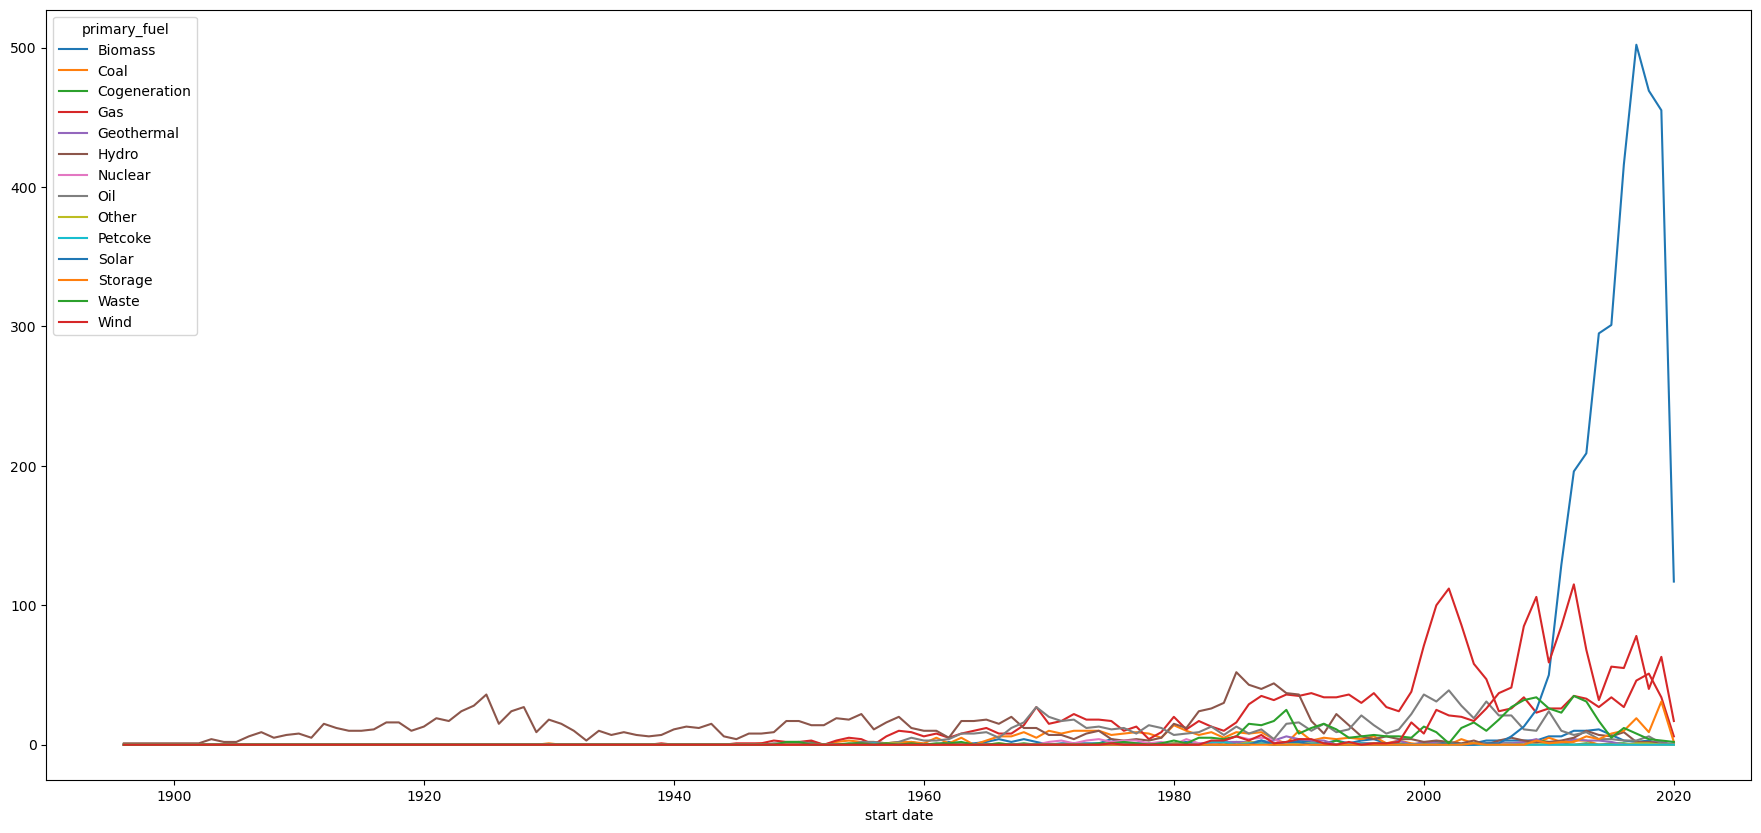

In [40]:
fig, ax = plt.subplots();
usa_group.plot(ax=ax)
#fig

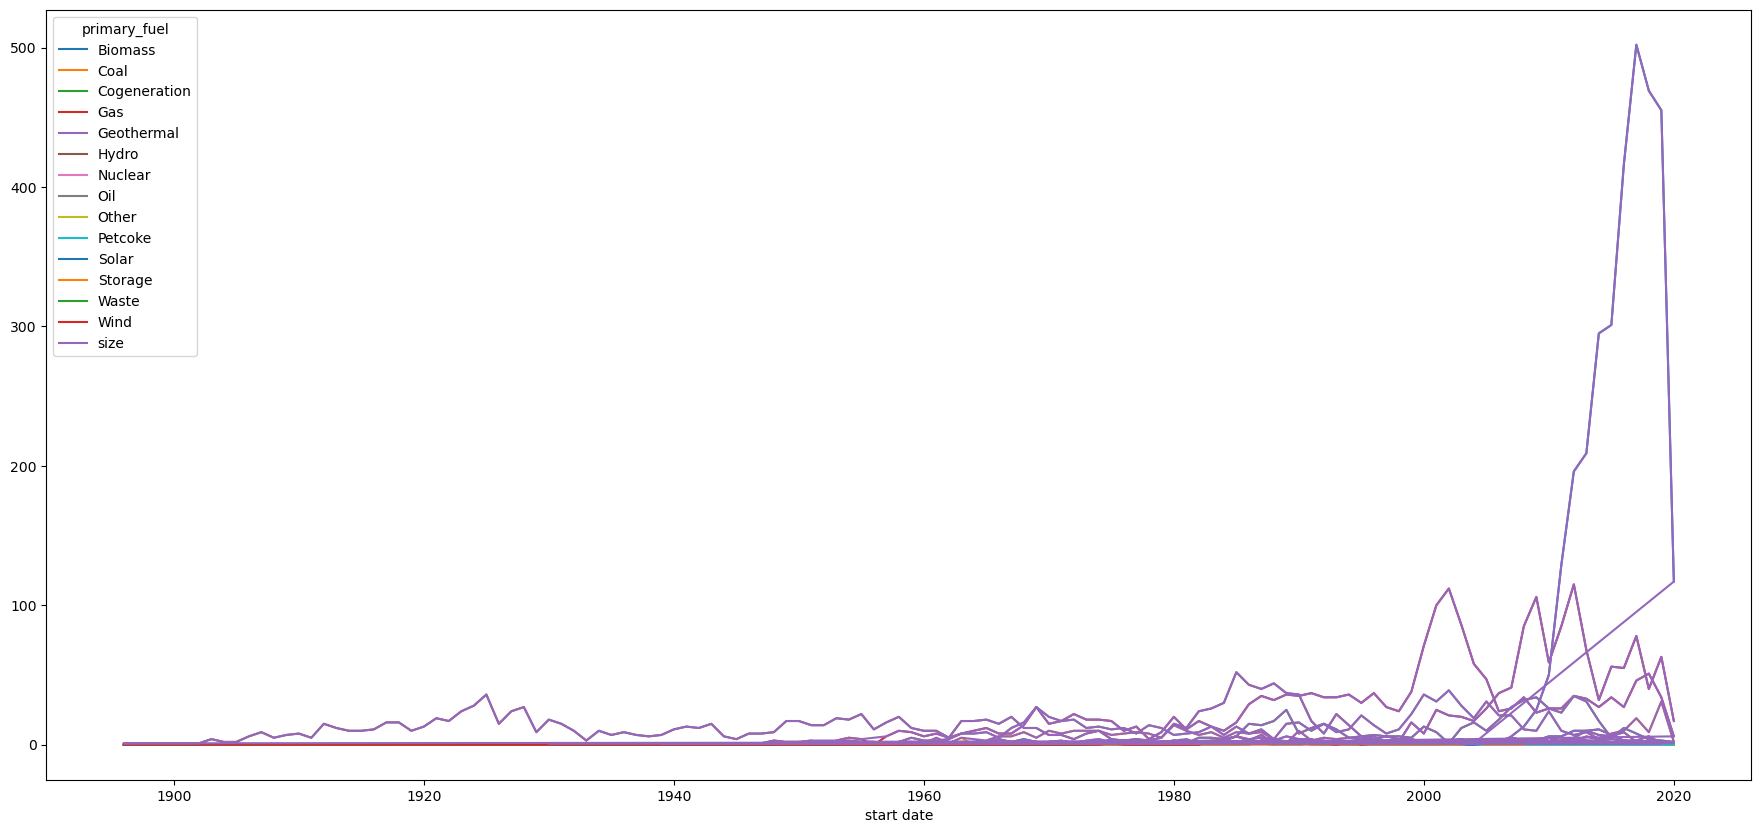

In [34]:
usa_group = gdf_nan_usa_clean.groupby(['primary_fuel','start date'],as_index=False).size()
usa_group.plot(x='start date',ax=ax)
fig

In [70]:
usa_group.isnull().sum()

primary_fuel    0
start date      0
size            0
dtype: int64

> **Q6: _Come up with your own question_**

In [ ]:
fig,ax = cuteplot(gdf_germany.loc[gdf_germany["primary_fuel"] == 'Solar'],
    
    color = 'red',
    markersize=5,
    map_extent = (5, 16, 47, 55),
    alpha=0.7,
    bw=0.1,
    ax=None,
    label='Other',
    draw_water=True,
    )
fig, ax = cuteplot(gdf_germany.loc[gdf_germany["primary_fuel"] == 'Hydro'],
    map_extent=(5, 16, 47, 55),
    color = 'blue',
    markersize=5,
    alpha=0.1,
    bw=0.1,
    ax=None,
    label='Hydro',
    draw_water=True,
    )

In [ ]:
fig,ax = cuteplot(gdf_germany.loc[gdf_germany["primary_fuel"] == 'Coal'],color = 'k',markersize=5,map_extent = (5, 16, 47, 55),alpha=0.7,bw=0.1,label='Coal',draw_water=True);
fig,ax = cuteplot(gdf_germany.loc[gdf_germany["primary_fuel"] == 'Coal'],color = 'k',markersize=5,map_extent = (5, 16, 47, 55),alpha=0.7,bw=0.1,label='Coal',draw_water=True);
cuteplot(gdf_germany.loc[gdf_germany["primary_fuel"] == "Hydro"], color = "blue",markersize=5,map_extent = (5, 16, 47, 55),alpha=0.7,bw=0.1, label = "Hydro", ax = ax)

#fig

In [ ]:
usa_group = gdf_nan_usa_clean.groupby(['primary_fuel','start date'],as_index=False).size()
usa_group = usa_group[['start date','geometry','primary_fuel']]
#usa_group.plot(x='start date')
usa_group['primary_fuel'].unique()

fuels = ['Biomass', 'Coal', 'Cogeneration', 'Gas', 'Geothermal', 'Hydro',
       'Nuclear', 'Oil', 'Other', 'Petcoke', 'Solar', 'Storage', 'Waste',
       'Wind']

for fuel in fuels:
    fig, ax = plt.subplots()
    _ = usa_group.loc[usa_group['primary_fuel']== fuel]
    _.plot(x='start date',ax=ax)
    ax.set_title(fuel)